In [1]:
import clean
import forecast
import pandas as pd
import numpy as np
import pytz
import datetime

In [135]:
import importlib
importlib.reload(clean)

<module 'clean' from '/home/smr1020/bumper/clean.py'>

In [136]:
import importlib
importlib.reload(forecast)

<module 'forecast' from '/home/smr1020/bumper/forecast.py'>

In [159]:
50%15

5

In [158]:
50 - 50%15

50

26

In [166]:
def time_nearest_15min():
    now = datetime.datetime.now()

    year = now.year
    month = now.month
    day = now.day
    hour = now.hour
    minute = now.minute
    minute = minute - minute%15

    return f'{year}-{month:02}-{day:02}T{hour:02}:{minute:02}:00Z'


In [167]:
time_nearest_15min

'2020-10-07T19:15:00Z'

In [149]:
boro_sel = ['Manhattan','Staten Island','Queens','Bronx','Brooklyn']
freq = '15min'
ampm = 'morning'
df = clean.load_speed_from_api(start_time=)
df = df.rename(columns={'SPEED':'Speed','LINK_ID':'linkId','DATA_AS_OF':'DataAsOf'})
df = clean.subset_speed_data(df,boro_sel)
df_rs = clean.downsample_sensors(df,freq)

_,median_speed = clean.nyc_median_speed(df_rs)
median_speed.iloc[0]
median_speed = median_speed.interpolate(method='linear')
median_speed.index = median_speed.index.tz_localize(tz='US/Eastern')
median_speed.index = median_speed.index.tz_convert('UTC')



df_weather,df_weather_pred = forecast.get_weather_data(freq,end_time=time_nearest_15min())
data_in = forecast.format_data_in_2h(ampm,median_speed,df_weather,df_weather_pred)

dropping na values, will take a couple minutes
done


In [152]:
model_name=f'weather_{ampm}'
forecast.speed_forecast_2h(model_name,data_in.astype('float32'))

array([nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [3]:
df = clean.subset_speed_data(path, boro_sel)

100%|██████████| 12/12 [00:37&lt;00:00,  3.12s/it]
dropping na values, will take couple minutes
done


In [5]:
df_rs = clean.downsample_sensors(df,freq)

In [6]:
cond_toss,median_speed = clean.nyc_median_speed(df_rs,set_na=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f786c3f6bb0&gt;

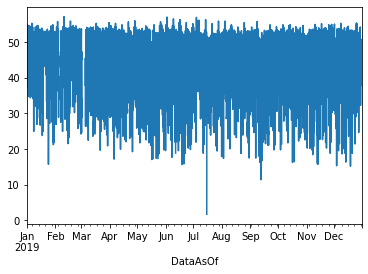

In [10]:
median_speed.plot(xlim=(f'{year}-01-01',f'{year}-12-31'))

In [11]:
window = '2H'
df_weather = clean.clean_weather(year,window,freq)

station       0
valid         0
tmpf        150
dwpf        152
p01i          0
sped       2715
dtype: int64


&lt;module &#39;clean&#39; from &#39;/home/smr1020/bumper/clean.py&#39;&gt;

In [17]:
df_merge = clean.merge_data(df_weather,median_speed)

In [18]:
df_morning,df_afternoon = clean.split_into_segments(df_merge,freq,save=False)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f785f17a5e0&gt;

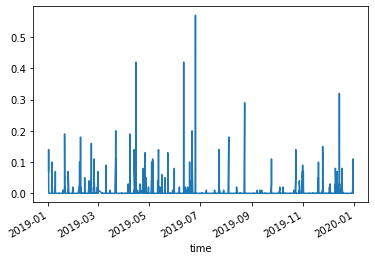

In [20]:
df_morning['p01i'].plot()

In [9]:
import datetime

In [16]:
import urllib.parse

query = ('SELECT SPEED,LINK_ID,DATA_AS_OF '
    f'WHERE DATA_AS_OF > \'2020-09-01\' '
    'LIMIT 10000')
query = urllib.parse.quote_plus(query)
query = f'$query={query}'

base_url = 'https://data.cityofnewyork.us/resource/i4gi-tjb9.csv?'

df = pd.read_csv(base_url+query)

In [19]:
df.tail()

,SPEED,LINK_ID,DATA_AS_OF
9995,37.90,4616342,2020-09-01T06:09:11.000
9996,50.95,4616350,2020-09-01T06:09:11.000
9997,31.68,4616351,2020-09-01T06:09:11.000
9998,50.95,4616352,2020-09-01T06:09:11.000
9999,31.68,4616353,2020-09-01T06:09:11.000


In [14]:
import os
import alert
import importlib
importlib.reload(alert)

&lt;module &#39;alert&#39; from &#39;/home/smr1020/bumper/alert.py&#39;&gt;